First of all, we import all the necessary libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.
/home/deeplearning_team6/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Then, we define the functions to define the model with the correspondent hyperparameters, to plot the accuracy and to plot the loss function. We need to define the number of layers in the network, the kernel size, the stride (how the filter convolves around the input volume), the dropout (to prevent the neural network from overfitting), the activation layer (in this case, Rectified Linear Units 'relu'), the metric to evaluate the model, the number of epochs (one pass of all the training inputs), the batch size (the number of training examples in one forward/backward pass)...

In [2]:
def try_hyperparameters(model,num_layers,kernel_size,stride):
    #https://keras.io/layers/convolutional/
    model.add(Conv2D(num_layers,(kernel_size, kernel_size),strides=(stride,stride), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
    return history

In [3]:
def plot_accuracy(history):
    plt.plot(history.history['acc'], label='training accuracy')
    plt.plot(history.history['val_acc'], label='validation accuracy')
    plt.legend()
    plt.title("Accuracy")    
    plt.show() 

In [4]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Loss (cat. cross entropy)')
    plt.legend()
    plt.show()

In the next cell, we do a preprocessing of the data, loading it, reshapening and normalizing from 0-255 to 0-1. In the last line, we observe the final dimension of our input data.

In [5]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Train with the chosen hyperparameters, and evaluate the loss function and accuracy in train and validation sets:

In [32]:
num_layers= 40
kernel_size= 7
stride = 2

In [33]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 3s - loss: 0.3569 - acc: 0.8980 - val_loss: 0.1038 - val_acc: 0.9693
Epoch 2/30
 - 3s - loss: 0.1081 - acc: 0.9684 - val_loss: 0.0635 - val_acc: 0.9808
Epoch 3/30
 - 3s - loss: 0.0777 - acc: 0.9761 - val_loss: 0.0459 - val_acc: 0.9852
Epoch 4/30
 - 3s - loss: 0.0607 - acc: 0.9820 - val_loss: 0.0441 - val_acc: 0.9862
Epoch 5/30
 - 3s - loss: 0.0513 - acc: 0.9847 - val_loss: 0.0364 - val_acc: 0.9879
Epoch 6/30
 - 3s - loss: 0.0452 - acc: 0.9861 - val_loss: 0.0383 - val_acc: 0.9875
Epoch 7/30
 - 3s - loss: 0.0389 - acc: 0.9883 - val_loss: 0.0318 - val_acc: 0.9892
Epoch 8/30
 - 3s - loss: 0.0366 - acc: 0.9887 - val_loss: 0.0346 - val_acc: 0.9892
Epoch 9/30
 - 3s - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0304 - val_acc: 0.9895
Epoch 10/30
 - 3s - loss: 0.0290 - acc: 0.9908 - val_loss: 0.0293 - val_acc: 0.9907
Epoch 11/30
 - 3s - loss: 0.0269 - acc: 0.9911 - val_loss: 0.0271 - val_acc: 0.9916
Epoch 12/30
 - 3s - loss: 0.0237 - 

Here we evaluate algorithm performance, with the calculation of the accuracy:

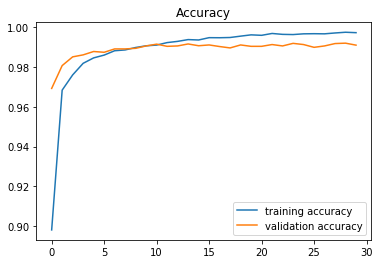

In [34]:
plot_accuracy(history)

And loss calculation:

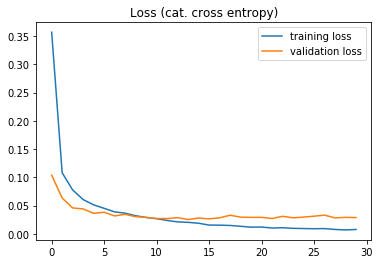

In [35]:
plot_loss(history)

For different hyperparameters:

In [7]:
num_layers= 20
kernel_size= 3
stride = 2

In [8]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 24s - loss: 0.5103 - acc: 0.8570 - val_loss: 0.1872 - val_acc: 0.9456
Epoch 2/30
 - 2s - loss: 0.1881 - acc: 0.9427 - val_loss: 0.1141 - val_acc: 0.9667
Epoch 3/30
 - 2s - loss: 0.1409 - acc: 0.9561 - val_loss: 0.0903 - val_acc: 0.9731
Epoch 4/30
 - 2s - loss: 0.1170 - acc: 0.9647 - val_loss: 0.0755 - val_acc: 0.9761
Epoch 5/30
 - 2s - loss: 0.1010 - acc: 0.9689 - val_loss: 0.0687 - val_acc: 0.9777
Epoch 6/30
 - 2s - loss: 0.0902 - acc: 0.9725 - val_loss: 0.0598 - val_acc: 0.9802
Epoch 7/30
 - 2s - loss: 0.0786 - acc: 0.9760 - val_loss: 0.0546 - val_acc: 0.9825
Epoch 8/30
 - 2s - loss: 0.0732 - acc: 0.9769 - val_loss: 0.0538 - val_acc: 0.9825
Epoch 9/30
 - 2s - loss: 0.0671 - acc: 0.9798 - val_loss: 0.0479 - val_acc: 0.9835
Epoch 10/30
 - 2s - loss: 0.0586 - acc: 0.9813 - val_loss: 0.0453 - val_acc: 0.9844
Epoch 11/30
 - 2s - loss: 0.0560 - acc: 0.9819 - val_loss: 0.0467 - val_acc: 0.9859
Epoch 12/30
 - 2s - loss: 0.0503 -

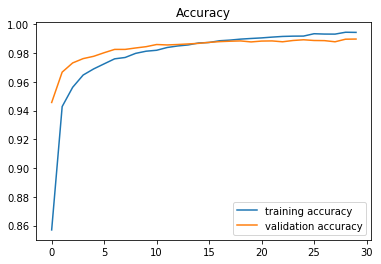

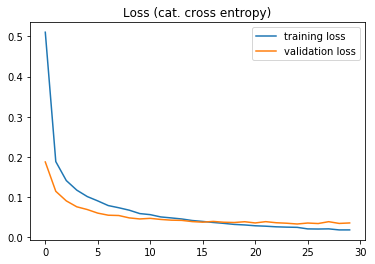

In [9]:
plot_accuracy(history)
plot_loss(history)

In [10]:
num_layers= 20
kernel_size= 7
stride = 2

In [11]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.4345 - acc: 0.8752 - val_loss: 0.1273 - val_acc: 0.9641
Epoch 2/30
 - 2s - loss: 0.1410 - acc: 0.9568 - val_loss: 0.0777 - val_acc: 0.9769
Epoch 3/30
 - 2s - loss: 0.1015 - acc: 0.9687 - val_loss: 0.0597 - val_acc: 0.9816
Epoch 4/30
 - 2s - loss: 0.0820 - acc: 0.9743 - val_loss: 0.0516 - val_acc: 0.9838
Epoch 5/30
 - 2s - loss: 0.0697 - acc: 0.9784 - val_loss: 0.0441 - val_acc: 0.9854
Epoch 6/30
 - 2s - loss: 0.0612 - acc: 0.9813 - val_loss: 0.0405 - val_acc: 0.9864
Epoch 7/30
 - 2s - loss: 0.0542 - acc: 0.9826 - val_loss: 0.0388 - val_acc: 0.9872
Epoch 8/30
 - 2s - loss: 0.0504 - acc: 0.9846 - val_loss: 0.0351 - val_acc: 0.9878
Epoch 9/30
 - 2s - loss: 0.0450 - acc: 0.9856 - val_loss: 0.0356 - val_acc: 0.9871
Epoch 10/30
 - 2s - loss: 0.0425 - acc: 0.9866 - val_loss: 0.0312 - val_acc: 0.9898
Epoch 11/30
 - 2s - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0323 - val_acc: 0.9894
Epoch 12/30
 - 2s - loss: 0.0341 - 

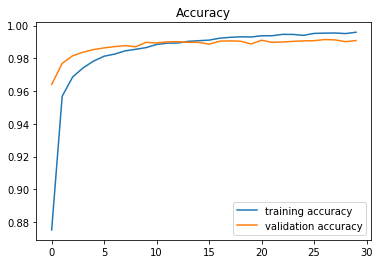

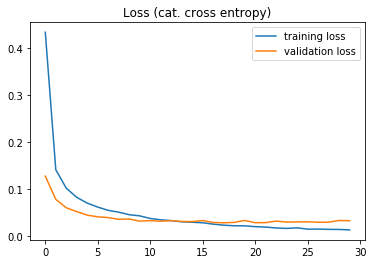

In [12]:
plot_accuracy(history)
plot_loss(history)

In [13]:
num_layers= 20
kernel_size= 10
stride = 2

In [14]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.4016 - acc: 0.8843 - val_loss: 0.1110 - val_acc: 0.9690
Epoch 2/30
 - 2s - loss: 0.1177 - acc: 0.9640 - val_loss: 0.0674 - val_acc: 0.9784
Epoch 3/30
 - 2s - loss: 0.0866 - acc: 0.9733 - val_loss: 0.0558 - val_acc: 0.9823
Epoch 4/30
 - 2s - loss: 0.0711 - acc: 0.9777 - val_loss: 0.0551 - val_acc: 0.9827
Epoch 5/30
 - 2s - loss: 0.0614 - acc: 0.9813 - val_loss: 0.0423 - val_acc: 0.9865
Epoch 6/30
 - 2s - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0383 - val_acc: 0.9868
Epoch 7/30
 - 2s - loss: 0.0481 - acc: 0.9849 - val_loss: 0.0344 - val_acc: 0.9873
Epoch 8/30
 - 2s - loss: 0.0429 - acc: 0.9864 - val_loss: 0.0340 - val_acc: 0.9879
Epoch 9/30
 - 2s - loss: 0.0390 - acc: 0.9877 - val_loss: 0.0343 - val_acc: 0.9880
Epoch 10/30
 - 2s - loss: 0.0365 - acc: 0.9882 - val_loss: 0.0327 - val_acc: 0.9883
Epoch 11/30
 - 2s - loss: 0.0330 - acc: 0.9896 - val_loss: 0.0312 - val_acc: 0.9890
Epoch 12/30
 - 2s - loss: 0.0306 - 

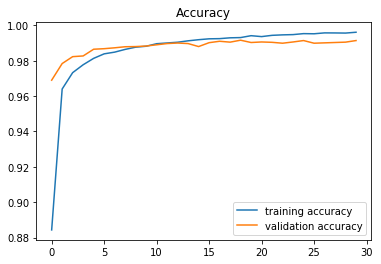

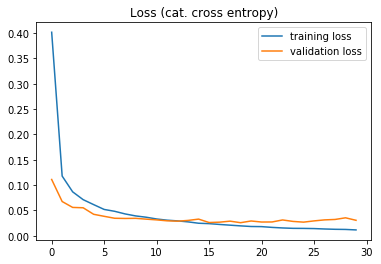

In [15]:
plot_accuracy(history)
plot_loss(history)

In [16]:
num_layers= 40
kernel_size= 10
stride = 2

In [17]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 3s - loss: 0.3263 - acc: 0.9078 - val_loss: 0.0920 - val_acc: 0.9718
Epoch 2/30
 - 3s - loss: 0.0927 - acc: 0.9722 - val_loss: 0.0607 - val_acc: 0.9809
Epoch 3/30
 - 3s - loss: 0.0657 - acc: 0.9800 - val_loss: 0.0430 - val_acc: 0.9857
Epoch 4/30
 - 3s - loss: 0.0533 - acc: 0.9842 - val_loss: 0.0368 - val_acc: 0.9875
Epoch 5/30
 - 3s - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0325 - val_acc: 0.9890
Epoch 6/30
 - 3s - loss: 0.0397 - acc: 0.9871 - val_loss: 0.0310 - val_acc: 0.9895
Epoch 7/30
 - 3s - loss: 0.0351 - acc: 0.9886 - val_loss: 0.0297 - val_acc: 0.9901
Epoch 8/30
 - 3s - loss: 0.0328 - acc: 0.9895 - val_loss: 0.0312 - val_acc: 0.9896
Epoch 9/30
 - 3s - loss: 0.0276 - acc: 0.9916 - val_loss: 0.0285 - val_acc: 0.9914
Epoch 10/30
 - 3s - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0269 - val_acc: 0.9911
Epoch 11/30
 - 3s - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0256 - val_acc: 0.9908
Epoch 12/30
 - 3s - loss: 0.0194 - 

In [18]:
num_layers= 30
kernel_size= 7
stride = 1

In [19]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 0.2337 - acc: 0.9329 - val_loss: 0.0720 - val_acc: 0.9776
Epoch 2/30
 - 3s - loss: 0.0675 - acc: 0.9803 - val_loss: 0.0479 - val_acc: 0.9848
Epoch 3/30
 - 3s - loss: 0.0492 - acc: 0.9852 - val_loss: 0.0416 - val_acc: 0.9855
Epoch 4/30
 - 3s - loss: 0.0392 - acc: 0.9877 - val_loss: 0.0349 - val_acc: 0.9877
Epoch 5/30
 - 3s - loss: 0.0309 - acc: 0.9904 - val_loss: 0.0342 - val_acc: 0.9883
Epoch 6/30
 - 3s - loss: 0.0265 - acc: 0.9914 - val_loss: 0.0313 - val_acc: 0.9893
Epoch 7/30
 - 3s - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0282 - val_acc: 0.9901
Epoch 8/30
 - 3s - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0321 - val_acc: 0.9891
Epoch 9/30
 - 3s - loss: 0.0159 - acc: 0.9948 - val_loss: 0.0308 - val_acc: 0.9892
Epoch 10/30
 - 3s - loss: 0.0160 - acc: 0.9946 - val_loss: 0.0342 - val_acc: 0.9897
Epoch 11/30
 - 3s - loss: 0.0123 - acc: 0.9957 - val_loss: 0.0275 - val_acc: 0.9914
Epoch 12/30
 - 3s - loss: 0.0100 - 

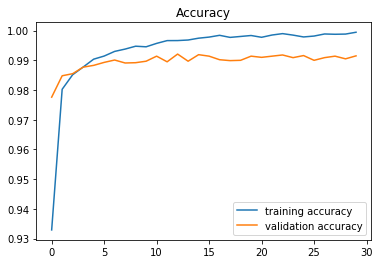

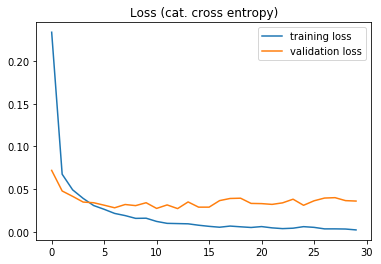

In [20]:
plot_accuracy(history)
plot_loss(history)

In [29]:
num_layers= 60
kernel_size= 20
stride = 2

In [30]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 3s - loss: 0.3951 - acc: 0.8897 - val_loss: 0.1296 - val_acc: 0.9609
Epoch 2/30
 - 2s - loss: 0.1382 - acc: 0.9579 - val_loss: 0.0844 - val_acc: 0.9739
Epoch 3/30
 - 2s - loss: 0.0981 - acc: 0.9702 - val_loss: 0.0632 - val_acc: 0.9799
Epoch 4/30
 - 2s - loss: 0.0807 - acc: 0.9754 - val_loss: 0.0560 - val_acc: 0.9842
Epoch 5/30
 - 2s - loss: 0.0683 - acc: 0.9787 - val_loss: 0.0521 - val_acc: 0.9835
Epoch 6/30
 - 2s - loss: 0.0590 - acc: 0.9819 - val_loss: 0.0485 - val_acc: 0.9842
Epoch 7/30
 - 2s - loss: 0.0544 - acc: 0.9829 - val_loss: 0.0511 - val_acc: 0.9838
Epoch 8/30
 - 3s - loss: 0.0478 - acc: 0.9850 - val_loss: 0.0467 - val_acc: 0.9847
Epoch 9/30
 - 2s - loss: 0.0447 - acc: 0.9856 - val_loss: 0.0472 - val_acc: 0.9857
Epoch 10/30
 - 2s - loss: 0.0401 - acc: 0.9870 - val_loss: 0.0512 - val_acc: 0.9841
Epoch 11/30
 - 2s - loss: 0.0387 - acc: 0.9873 - val_loss: 0.0436 - val_acc: 0.9866
Epoch 12/30
 - 2s - loss: 0.0350 - 

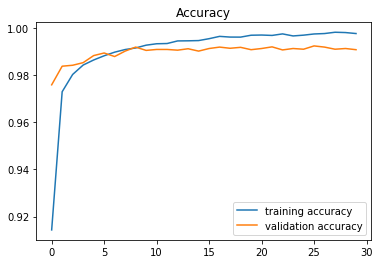

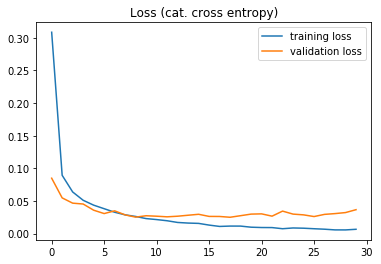

In [23]:
plot_accuracy(history)
plot_loss(history)

After several tries, we conclude that the best baseline error obtained is 0.82%, using 40 layers, a 10-size kernel and 2 strides.  If we continue increasing this values, an overfitting may happen, improving the results in the training set but decreasing in validation and test.